#Distribución t-student
**Joel Isaias Solano Ocampo | A01639289**


---

Un nutricionista está investigando el contenido de vitamina C en dos tipos de jugo de naranja. Tomó muestras aleatorias de cada tipo de jugo y registró los siguientes niveles promedio de vitamina C en miligramos por 100 ml:

* Tipo de jugo A: 20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23.
* Tipo de jugo B: 19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18.

Calcula un intervalo de confianza del 99% para la media poblacional del contenido de vitamina C de ambos jugos.

In [167]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import kstest
import matplotlib.pyplot as plt
from scipy.stats import t, stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler

##DataFrame

---



In [168]:
data = {'Jugo A': [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23],
        'Jugo B': [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22 ,21 ,20 ,19 ,18 ,23 ,22 ,21 ,20 ,19 ,18]}
df = pd.DataFrame(data)
df.head()

,Jugo A,Jugo B
0,20,19
1,25,18
2,22,21
3,23,20
4,28,23


In [169]:
scaler = StandardScaler()
df_standard_scaler = scaler.fit_transform(df)
df_standard_scaler = pd.DataFrame(df_standard_scaler, columns = df.columns)

In [170]:
def standard_data(data):
  mean = np.mean(data)
  std_dev = np.std(data)/np.sqrt(df.shape[0])
  standardized_data = (data-mean)/std_dev
  return standardized_data

In [171]:
df_standard_def = df.apply(standard_data)

##QQ-Plot

---



<Figure size 1200x600 with 0 Axes>

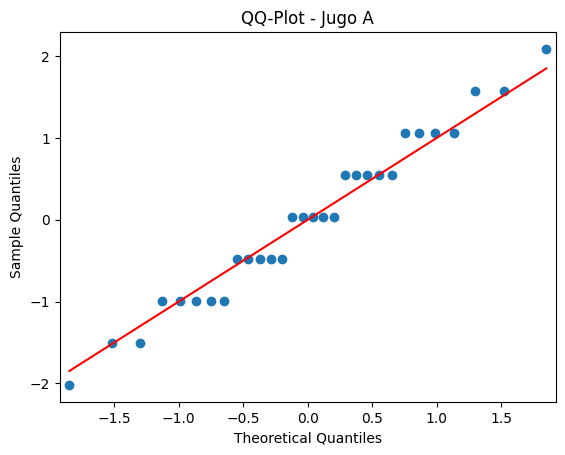

In [172]:
plt.figure(figsize = (12, 6))
sm.qqplot(df_standard_scaler['Jugo A'], line='s')
plt.title('QQ-Plot - Jugo A')
plt.show()

<Figure size 1200x600 with 0 Axes>

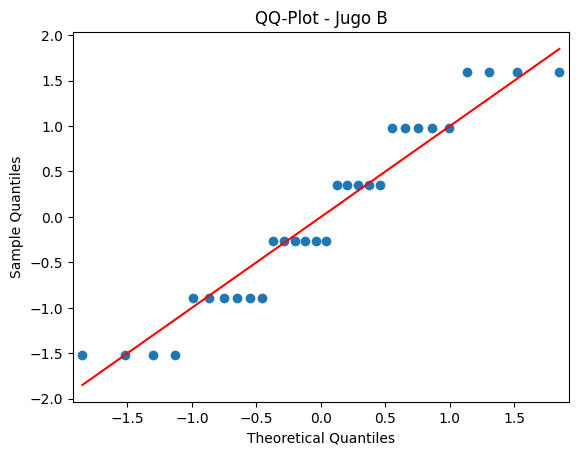

In [173]:
plt.figure(figsize = (12, 6))
sm.qqplot(df_standard_scaler['Jugo B'], line='s')
plt.title('QQ-Plot - Jugo B')
plt.show()

<Figure size 1200x600 with 0 Axes>

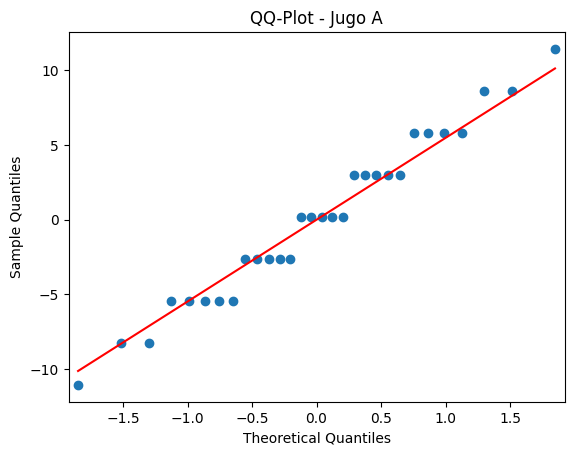

In [174]:
plt.figure(figsize = (12, 6))
sm.qqplot(df_standard_def['Jugo A'], line='s')
plt.title('QQ-Plot - Jugo A')
plt.show()

<Figure size 1200x600 with 0 Axes>

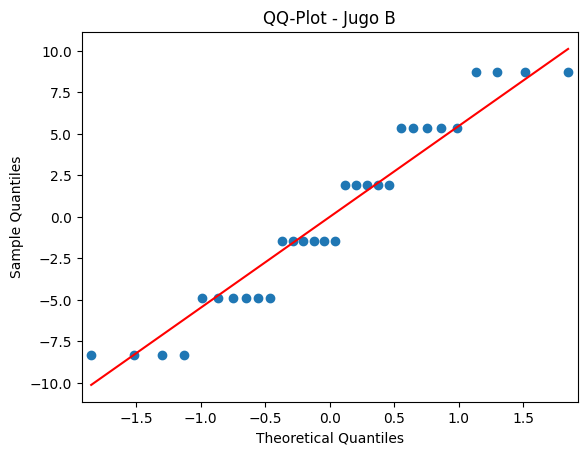

In [175]:
plt.figure(figsize = (12, 6))
sm.qqplot(df_standard_def['Jugo B'], line='s')
plt.title('QQ-Plot - Jugo B')
plt.show()

##Kolmogorov Smirnov


---



In [176]:
ks_statistic_a = kstest(df_standard_scaler['Jugo A'], 'norm')
print('Kolmogorov Smirnov para Jugo A: ', ks_statistic_a)

ks_statistic_b = kstest(df_standard_scaler['Jugo B'], 'norm')
print('Kolmogorov Smirnov para Jugo B: ', ks_statistic_a)

Kolmogorov Smirnov para Jugo A:  KstestResult(statistic=0.11738896673840382, pvalue=0.7596266894154436, statistic_location=-0.4790701375804085, statistic_sign=1)
Kolmogorov Smirnov para Jugo B:  KstestResult(statistic=0.11738896673840382, pvalue=0.7596266894154436, statistic_location=-0.4790701375804085, statistic_sign=1)


In [177]:
ks_statistic_a = kstest(df_standard_def['Jugo A'], 'norm')
print('Kolmogorov Smirnov para Jugo A: ', ks_statistic_a)

ks_statistic_b = kstest(df_standard_def['Jugo B'], 'norm')
print('Kolmogorov Smirnov para Jugo B: ', ks_statistic_a)

Kolmogorov Smirnov para Jugo A:  KstestResult(statistic=0.42898782780148464, pvalue=1.5705101005754954e-05, statistic_location=-2.6239752097989313, statistic_sign=1)
Kolmogorov Smirnov para Jugo B:  KstestResult(statistic=0.42898782780148464, pvalue=1.5705101005754954e-05, statistic_location=-2.6239752097989313, statistic_sign=1)


##t-student

---



In [178]:
lvl_confidence = 0.99
alpha = (1-lvl_confidence)/2

In [179]:
mean_a = np.mean(df['Jugo A'])
mean_b = np.mean(df['Jugo B'])

In [180]:
std_a = np.sqrt(sum((n-mean_a)**2 for n in df['Jugo A'])/(len(df['Jugo A'])-1))
std_b = np.sqrt(sum((n-mean_a)**2 for n in df['Jugo A'])/(len(df['Jugo A'])-1))

In [181]:
size_a = len(df['Jugo A'])
size_b = len(df['Jugo B'])

In [182]:
t_critical_a = 2.750
t_critical_b = t_critical_a

In [183]:
margin_err_a = t_critical_a*(std_a/np.sqrt(size_a))
margin_err_b = t_critical_b*(std_b/np.sqrt(size_b))

##Intervalos de confianza

---



In [184]:
confidence_int_a = (mean_a-margin_err_a, mean_a+margin_err_a)
confidence_int_b = (mean_b-margin_err_b, mean_b+margin_err_b)
width = (mean_a+margin_err_a)-(mean_a-margin_err_a)

In [185]:
print("Intervalo de confianza para Jugo A: ", confidence_int_a)
print("Intervalo de confianza para Jugo B: ", confidence_int_b)
print("Ancho: ", width)

Intervalo de confianza para Jugo A:  (22.93845179665138, 24.92821487001529)
Intervalo de confianza para Jugo B:  (19.43845179665138, 21.42821487001529)
Ancho:  1.9897630733639105
